In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Семинар. Библиотека sklearn
В этом семинаре мы научимся решать простейшую задачу машинного обучения на примере датасета <a href="https://www.kaggle.com/ajaypalsinghlo/world-happiness-report-2021">World Happiness Report 2021</a>.

<img src="https://www.dropbox.com/s/cyzp70lgz8463rp/happiness.jpg?dl=1" style="height:450px;">

# Загрузка данных
Нас интересует файл world-happiness-report-2021 по <a href="https://www.kaggle.com/ajaypalsinghlo/world-happiness-report-2021?select=world-happiness-report-2021.csv">ссылке</a>. Загрузим данные

In [2]:
raw_data = pd.read_csv('https://www.dropbox.com/s/qe604sk62jxh5pb/world_happiness_report_2021.csv?dl=1')

#raw_data = pd.read_csv("world_happiness_report_2021.csv")

Небольшая обработка данных (выкидываем ненужные колонки), назначаем новый индекс и т.д.

Целевая переменная датасета называется Ladder score. Это средний показатель счастья респондентов, сгруппированный по стране. Остальные данные (кроме регионального показателя) являются числовыми данными, которые мы будем использовать для предсказания счастья.

In [3]:
raw_data = raw_data[['Country name', 'Regional indicator', 'Ladder score', 'Logged GDP per capita', 
             'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 
             'Generosity', 'Perceptions of corruption']]

raw_data.index = raw_data['Country name']
raw_data = raw_data.drop(columns='Country name') #delete column country name
raw_data = raw_data.sort_values('Ladder score', ascending=False)

In [4]:
print(f'Всего {len(raw_data)} стран')
raw_data.head(10)

Всего 149 стран


,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country name,,,,,,,,
Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338
Norway,Western Europe,7.392,11.053,0.954,73.3,0.960,0.093,0.270
Sweden,Western Europe,7.363,10.867,0.934,72.7,0.945,0.086,0.237
Luxembourg,Western Europe,7.324,11.647,0.908,72.6,0.907,-0.034,0.386
New Zealand,North America and ANZ,7.277,10.643,0.948,73.4,0.929,0.134,0.242


## Предварительный анализ данных

### Задание 
Постройте гистограмму целевой переменной. Используйте ``pandasDataFrame.hist``

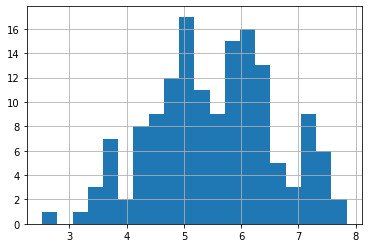

In [8]:
raw_data['Ladder score'].hist(bins=20)

### Задание 
Постройте матрицу корреляций целевой переменной с признаками.

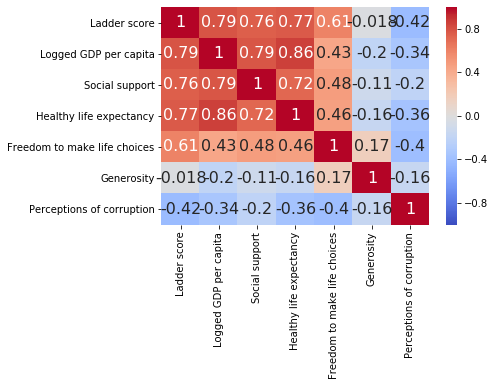

In [9]:
import seaborn as sns

sns.heatmap(raw_data.corr(), annot=True, cmap='coolwarm',
            vmin=-1, vmax=1, annot_kws={"size": 16})

### Задание 
Найдите в списке Россию и выведите её <strike>товарищей по несчастью</strike> соседей по счастью 

In [ ]:
np.arange(149)[raw_data.index == 'Russia']

In [ ]:
rus_idx = #YOUR CODE: найдите номер России в таблице
#YOUR CODE

## Подготовка данных, разбиение на train и test, нормировка данных
Для наглядности мы будем решать задачу классификации, а не регрессии. Предварительно поделим все страны на "счастливые" и "несчастные".

In [10]:
#перемешаем данные для надёжности
data = raw_data.sample(frac=1)

### Задание
Сформируйте матрицу объекты-признаки, выкинув целевую переменную, а также переменную Regional Indicator (она категориальная, и мы не будем с ней заморачиваться).

Выделите в целевую переменную 1, если показатель счастья больше некоторой константы, и 0, иначе. В качестве константы возьмите порог 5.5. 

In [11]:
data

,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country name,,,,,,,,
Lesotho,Sub-Saharan Africa,3.512,7.926,0.787,48.700,0.715,-0.131,0.915
Afghanistan,South Asia,2.523,7.695,0.463,52.493,0.382,-0.102,0.924
Finland,Western Europe,7.842,10.775,0.954,72.000,0.949,-0.098,0.186
Venezuela,Latin America and Caribbean,4.892,9.073,0.861,66.700,0.615,-0.169,0.827
Colombia,Latin America and Caribbean,6.012,9.557,0.847,68.001,0.837,-0.135,0.841
Laos,Southeast Asia,5.030,8.947,0.728,58.968,0.910,0.123,0.658
Honduras,Latin America and Caribbean,5.919,8.648,0.812,67.300,0.857,0.081,0.809
Italy,Western Europe,6.483,10.623,0.880,73.800,0.693,-0.084,0.866
Switzerland,Western Europe,7.571,11.117,0.942,74.400,0.919,0.025,0.292


In [13]:
X = data.drop(columns=['Regional indicator', 'Ladder score'])
y = (data['Ladder score'] > 5.5).astype(int)

Посмотрим на баланс классов:

In [16]:
y.mean()

0.5033557046979866

### Задание
Разбейте данные на train и test в пропорции 70:30. Используйте функцию  ``sklearn.model_selection.train_test_split``.

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

### Задание
Отнормируйте матрицу объекты-признаки. Найдите нормировочные коэффициенты по обучающей выборке, примените их к тестовой выборке

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Самый главный момент: обучение и предсказание
### Задание
Создайте модель $k$ ближайших соседей при $k = 5$. Обучите её на ``X_train_scaled`` (метод ``.fit``) и предскажите ответы на ``y_train`` и ``y_test`` (метод ``predict``).

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
model = KNeighborsClassifier(n_neighbors=5)

model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [24]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

## Не менее важный момент: измерение результатов
### Задание
Посчитайте качество (процент угаданных ответов) на обучающей и тестовой выборках

In [25]:
from sklearn.metrics import accuracy_score

In [27]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Качество на обучающей выборке: {train_accuracy}')
print(f'Качество на тестовой выборке: {test_accuracy}')

Качество на обучающей выборке: 0.8738738738738738
Качество на тестовой выборке: 0.7894736842105263


## Бонус: кросс-валидация

### Кросс-валидация
Иногда просто разбиение на обучающую и тестовую выборки не даёт точного прогноза оценки ошибки, ведь обученный алгоритм может сильно меняться в зависимости от обучающей выборки. Чтобы нивелировать эффект конкретной обучающей выборки, используют так называему кросс-валидацию. Идея кросс-валидации состоит в том, чтобы разбить все данные на несколько одинаковых по размеру частей, поочерёдно используя каждую часть как test, а оставшийся датасет --- как train. На каждом из экспериментов вычисляют тестовую ошибку, затем результат усредняют по всем экспериментам.

![alt text](https://drive.google.com/uc?id=1cS2AoSrcG5sCGbnKhkv3ZYqKSmtPd-XM)

Выполним эту схему на нашем датасете. Кросс-валидация находится в модуле sklearn.model_selection.

In [ ]:
from sklearn.model_selection import cross_val_score

result = cross_val_score(estimator=KNeighborsClassifier(n_neighbors=5), X=X_train_scaled, y=y_train, 
                         scoring='accuracy', cv=5)
result

### Найдем наилучший параметр с помощью кросс-валидации с перебором по сетке

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
gbr_grid_search = GridSearchCV(KNeighborsClassifier(), 
                               [{'n_neighbors': np.arange(1, 25, 2)}],
                               cv=5,
                               scoring='accuracy',
                               verbose=10)

results = gbr_grid_search.fit(X_train_scaled, y_train)

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(1, 25, 2), results.cv_results_['mean_test_score'], label='mean test score')
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('score')
plt.grid()
plt.show()

In [ ]:
results.best_params_